In [1]:
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [2]:
import pandas as pd
import numpy as np

### Start the Modeling

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 min 21 secs
H2O cluster version:,3.10.4.5
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_lingyaomeng_k4j0fa
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [6]:
mydata = h2o.import_file("/Users/lingyaomeng/Desktop/04202017DM_presentation_all/apr19.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
mydata.describe()

Rows:113
Cols:272




,Country,2017IPC3AndAbove,indicators,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Adult literacy rate, population 15+ years, both sexes (%)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Agriculture value added per worker (constant 2010 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2010 US$)","Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide","Automated teller machines (ATMs) (per 100,000 adults)",Broad money (% of GDP),Broad money growth (annual %),"Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient)",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Claims on central government (annual growth as % of broad money),"Claims on central government, etc. (% GDP)",Claims on private sector (annual growth as % of broad money),"Commercial bank branches (per 100,000 adults)",Commercial service exports (current US$),"Communications, computer, etc. (% of service exports, BoP)","Computer, communications and other services (% of commercial service exports)",Consumer price index (2010 = 100),Cost of business start-up procedures (% of GNI per capita),"Cost of business start-up procedures, female (% of GNI per capita)","Cost of business start-up procedures, male (% of GNI per capita)",Current account balance (% of GDP),"Current account balance (BoP, current US$)",DEC alternative conversion factor (LCU per US$),Depth of credit information index (0=low to 8=high),Diabetes prevalence (% of population ages 20 to 79),Distance to frontier score (0=lowest performance to 100=frontier),Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Ease of doing business index (1=most business-friendly regulations),Export value index (2000 = 100),Export volume index (2000 = 100),Exports of goods and services (% of GDP),"Exports of goods and services (BoP, current US$)",Exports of goods and services (annual % growth),Exports of goods and services (constant 2010 US$),"Exports of goods, services and primary income (BoP, current US$)",External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (constant 2010 US$),"Final consumption expenditure, etc. (% of GDP)","Final consumption expenditure, etc. (annual % growth)","Final consumption expenditure, etc. (constant 2010 US$)",Fixed broadband subscriptions,Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),Food exports (% of merchandise exports),Food imports (% of merchandise imports),"Foreign direct investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)","Foreign direct investment, net outflows (% of GDP)","Foreign direct investment, net outflows (BoP, current US$)",Forest area (% of land area),Forest area (sq. km),Forest rents (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),GDP (current US$),GDP at market prices (constant 2010 US$),GDP deflator (base year varies by country),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita growth (annual %),"GDP per capita, PPP (constant 2011 international $)","GDP, PPP (constant 2011 international $)",GNI (constant 2010 US$),GNI growth (annual %),GNI per capita (constant 2010 US$),GNI per capita growth (annual %),"GNI per capita, PPP (constant 2011 international $)","GNI, PPP (constant 2011 international $)

## Elastic Net

In [9]:
# assign target and inputs
y = '2017IPC3AndAbove'
#print(y)

2017IPC3AndAbove


In [10]:
X = [name for name in mydata.columns if name not in ['indicators','Country', y]]
print(y)
print(X)

2017IPC3AndAbove
['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adult literacy rate, population 15+ years, both sexes (%)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)', 'Agriculture value added per worker (constant 2010 US$)', 'Agriculture, value added (% of GDP)', 'Agriculture, value added (annual % growth)', 'Agriculture, value added (constant 2010 US$)', 'Air transport, freight (million ton-km)', 'Air transport, passengers carried', 'Air transport, registered carrier departures worldwide', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Broad money (% of GDP)', 'Broad money growth (annual %)', 'Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient)', 'Business extent of 

In [11]:
#Cross Validation
folds=5
glm_kfold = H2OGeneralizedLinearEstimator(family='binomial',
                                         model_id='glm_kfold_new',
                                         solver='IRLSM',
                                         nfolds = 5, 
                                        seed = 1234,
                                         standardize=True,
                                          alpha=1,
                                         lambda_search=True)

In [12]:
glm_kfold.train(X,y,training_frame=mydata)

glm Model Build progress: |███████████████████████████████████████████████| 100%


Variable importance does not apply to GLM. Will use std_coef_plot() instead.


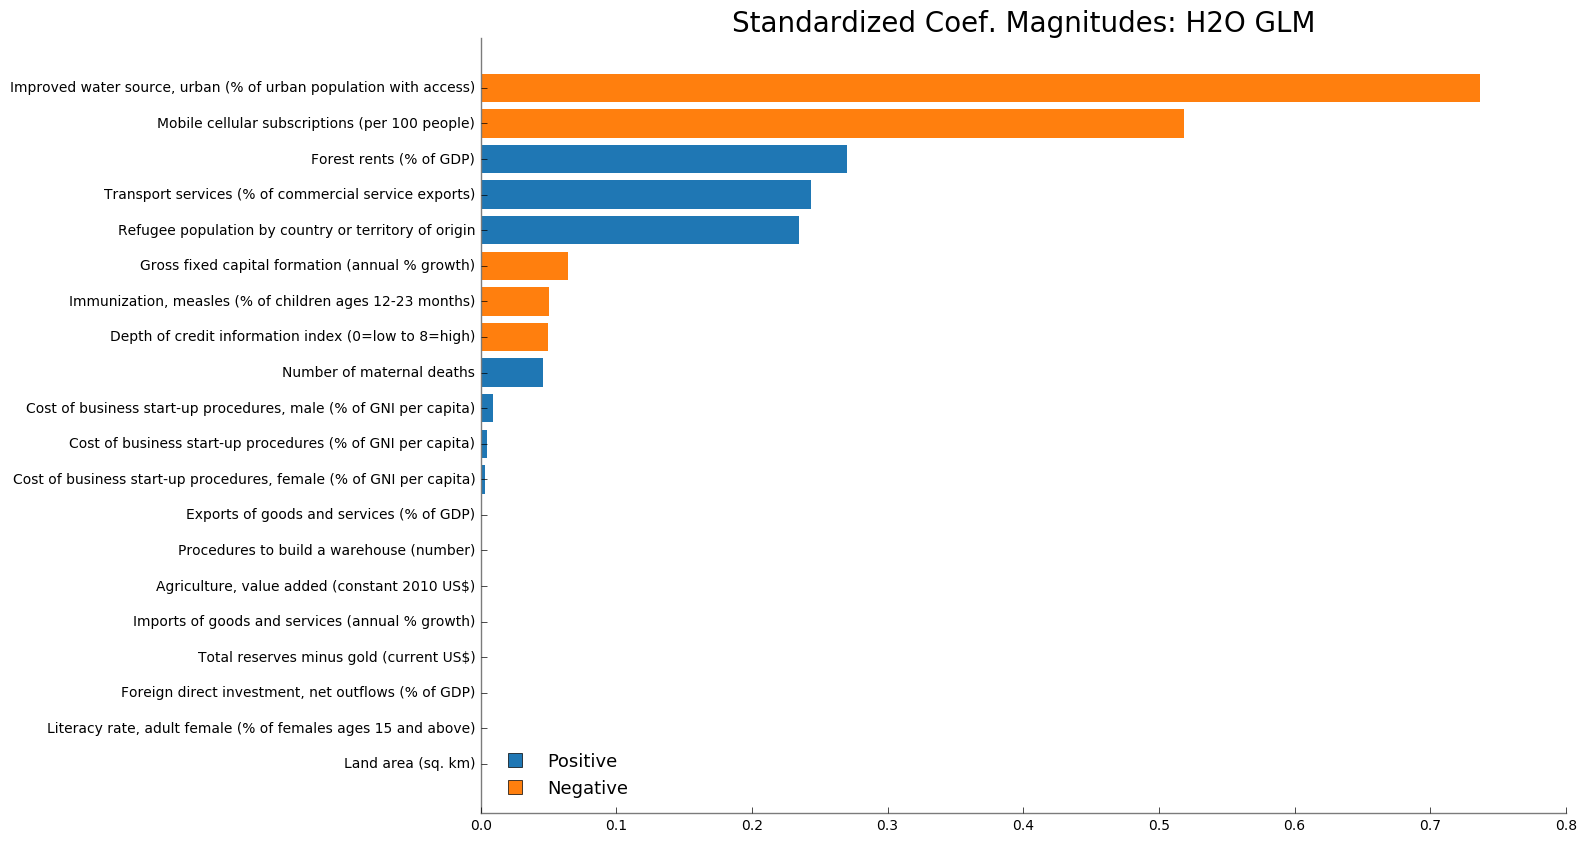

In [13]:
glm_kfold.varimp_plot(num_of_features=20)

In [14]:
dfoutput=pd.DataFrame.from_dict(glm_kfold.coef_norm(),orient='index')
dfoutput.columns=['coefficient']
dfoutput['abs(coef)']=abs(dfoutput['coefficient'])
dfoutput.sort('abs(coef)',ascending=False).head(30)

/Users/lingyaomeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,abs(coef)
Intercept,-2.996508,2.996508
"Improved water source, urban (% of urban population with access)",-0.736813,0.736813
Mobile cellular subscriptions (per 100 people),-0.518602,0.518602
Forest rents (% of GDP),0.270222,0.270222
Transport services (% of commercial service exports),0.243190,0.243190
Refugee population by country or territory of origin,0.234511,0.234511
Gross fixed capital formation (annual % growth),-0.064385,0.064385
"Immunization, measles (% of children ages 12-23 months)",-0.050505,0.050505
Depth of credit information index (0=low to 8=high),-0.049513,0.049513
Number of maternal deaths,0.045690,0.045690


## Below is the GBM and Random Forest

#### Read the data first and then assign the target variable and independent variables

In [15]:
df = h2o.import_file(path = "/Users/lingyaomeng/Desktop/04202017DM_presentation_all/apr19.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
## pick a response for the supervised problem
response = "2017IPC3AndAbove"
y = "2017IPC3AndAbove"
## the response variable is an integer, we will turn it into a categorical/factor for binary classification
df[response] = df[response].asfactor()           

## use all other columns (except for the name & the response column ("survived")) as predictors
predictors = [name for name in df.columns if name not in ['Country', 'indicators', response]]
print (predictors)

['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adult literacy rate, population 15+ years, both sexes (%)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)', 'Agriculture value added per worker (constant 2010 US$)', 'Agriculture, value added (% of GDP)', 'Agriculture, value added (annual % growth)', 'Agriculture, value added (constant 2010 US$)', 'Air transport, freight (million ton-km)', 'Air transport, passengers carried', 'Air transport, registered carrier departures worldwide', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Broad money (% of GDP)', 'Broad money growth (annual %)', 'Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient)', 'Business extent of disclosure index 

### GBM

In [17]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator(nfolds=5),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=predictors,
              y=y,
              training_frame=df
              )
#It takes time

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [18]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model


     col_sample_rate max_depth ntrees sample_rate  \
0                0.7        16     50         0.4   
1                0.6        18     50         0.9   
2                0.5        18    100         0.2   
3                0.5        18      0         1.0   
4                0.4         4      0         0.7   
5                0.3        12      0         0.7   
6                0.1         4      0         0.5   
7                0.7        16    200         0.3   
8                0.1        14    250         0.6   
9                0.4         4    200         0.7   
10               0.1         4    350         0.5   
11               0.9         2    400         0.3   
12               0.6         8    250         0.6   
13               0.3        18    350         0.7   
14               1.0         4    450         1.0   
15               0.5        12    400         0.9   
16               0.3        16    450         1.0   
17               0.8        18    350         

,0,1,Error,Rate
0,101.0,0.0,0.0,(0.0/101.0)
1,0.0,12.0,0.0,(0.0/12.0)
Total,101.0,12.0,0.0,(0.0/113.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6850980,1.0,11.0
max f2,0.6850980,1.0,11.0
max f0point5,0.6850980,1.0,11.0
max accuracy,0.6850980,1.0,11.0
max precision,0.9456282,1.0,0.0
max recall,0.6850980,1.0,11.0
max specificity,0.9456282,1.0,0.0
max absolute_mcc,0.6850980,1.0,11.0
max min_per_class_accuracy,0.6850980,1.0,11.0
max mean_per_class_accuracy,0.6850980,1.0,11.0


Gains/Lift Table: Avg response rate: 10.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0176991,0.9436273,9.4166667,9.4166667,1.0,1.0,0.1666667,0.1666667,841.6666667,841.6666667
,2,0.0265487,0.9279280,9.4166667,9.4166667,1.0,1.0,0.0833333,0.25,841.6666667,841.6666667
,3,0.0353982,0.9029110,9.4166667,9.4166667,1.0,1.0,0.0833333,0.3333333,841.6666667,841.6666667
,4,0.0442478,0.8744342,9.4166667,9.4166667,1.0,1.0,0.0833333,0.4166667,841.6666667,841.6666667
,5,0.0530973,0.8601343,9.4166667,9.4166667,1.0,1.0,0.0833333,0.5,841.6666667,841.6666667
,6,0.1061947,0.5818700,9.4166667,9.4166667,1.0,1.0,0.5,1.0,841.6666667,841.6666667
,7,0.1504425,0.0457006,0.0,6.6470588,0.0,0.7058824,0.0,1.0,-100.0,564.7058824
,8,0.2035398,0.0173602,0.0,4.9130435,0.0,0.5217391,0.0,1.0,-100.0,391.3043478
,9,0.3008850,0.0079225,0.0,3.3235294,0.0,0.3529412,0.0,1.0,-100.0,232.3529412
,10,0.3982301,0.0049219,0.0,2.5111111,0.0,0.2666667,0.0,1.0,-100.0,151.1111111




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.06884562929277659
RMSE: 0.26238450657913587
LogLoss: 0.22578546788509593
Mean Per-Class Error: 0.11798679867986794
AUC: 0.9257425742574258
Gini: 0.8514851485148516
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10021351546368641: 


,0,1,Error,Rate
0,94.0,7.0,0.0693,(7.0/101.0)
1,2.0,10.0,0.1667,(2.0/12.0)
Total,96.0,17.0,0.0796,(9.0/113.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1002135,0.6896552,16.0
max f2,0.1002135,0.7692308,16.0
max f0point5,0.3327447,0.625,8.0
max accuracy,0.3327447,0.9203540,8.0
max precision,0.6882225,0.6666667,2.0
max recall,0.0080104,1.0,43.0
max specificity,0.7561531,0.9900990,0.0
max absolute_mcc,0.1002135,0.6584148,16.0
max min_per_class_accuracy,0.1002135,0.8333333,16.0
max mean_per_class_accuracy,0.1002135,0.8820132,16.0


Gains/Lift Table: Avg response rate: 10.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0176991,0.7195608,4.7083333,4.7083333,0.5,0.5,0.0833333,0.0833333,370.8333333,370.8333333
,2,0.0265487,0.6809534,9.4166667,6.2777778,1.0,0.6666667,0.0833333,0.1666667,841.6666667,527.7777778
,3,0.0353982,0.6561525,0.0,4.7083333,0.0,0.5,0.0,0.1666667,-100.0,370.8333333
,4,0.0442478,0.6052619,0.0,3.7666667,0.0,0.4,0.0,0.1666667,-100.0,276.6666667
,5,0.0530973,0.5387448,9.4166667,4.7083333,1.0,0.5,0.0833333,0.25,841.6666667,370.8333333
,6,0.1061947,0.2379091,4.7083333,4.7083333,0.5,0.5,0.25,0.5,370.8333333,370.8333333
,7,0.1504425,0.0848060,7.5333333,5.5392157,0.8,0.5882353,0.3333333,0.8333333,653.3333333,453.9215686
,8,0.2035398,0.0363921,0.0,4.0942029,0.0,0.4347826,0.0,0.8333333,-100.0,309.4202899
,9,0.3008850,0.0144398,0.8560606,3.0465686,0.0909091,0.3235294,0.0833333,0.9166667,-14.3939394,204.6568627
,10,0.3982301,0.0075279,0.8560606,2.5111111,0.0909091,0.2666667,0.0833333,1.0,-14.3939394,151.1111111



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7671428,0.2716799,0.9523810,1.0,0.95,0.0,0.9333333
auc,0.971071,0.0183542,0.9852941,1.0,0.9444444,NaN,0.9545454
err,0.0500877,0.0202249,0.0476191,0.0,0.05,0.0861530,0.0666667
err_count,0.75,0.3535534,1.0,0.0,1.0,NaN,1.0
f0point5,0.7261024,0.2514688,0.8333333,1.0,0.8333333,0.0263454,0.9375
f1,NaN,Infinity,0.8888889,1.0,0.6666667,-Infinity,0.8571429
f2,0.6919446,0.2171057,0.9523810,1.0,0.5555556,0.1623127,0.7894737
lift_top_group,6.8,3.6800137,5.25,15.0,10.0,None,3.75
logloss,0.2460822,0.1415422,0.4285934,0.0757372,0.2047693,None,0.5213109
max_per_class_error,0.1617647,0.1360592,0.0588235,0.0,0.5,None,0.25


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-04-21 16:43:34,53.800 sec,0.0,0.3080866,0.3384847,0.5,1.0,0.8938053
,2017-04-21 16:43:34,53.820 sec,1.0,0.2926000,0.2978974,0.8964521,7.5333333,0.0530973
,2017-04-21 16:43:34,53.839 sec,2.0,0.2819407,0.2754560,0.9418317,7.5333333,0.0530973
,2017-04-21 16:43:34,53.859 sec,3.0,0.2642495,0.2437384,0.9884488,9.4166667,0.0353982
,2017-04-21 16:43:34,53.880 sec,4.0,0.2540786,0.2277604,0.9900990,9.4166667,0.0353982
---,---,---,---,---,---,---,---,---
,2017-04-21 16:43:35,54.652 sec,46.0,0.0705682,0.0334859,1.0,9.4166667,0.0
,2017-04-21 16:43:35,54.670 sec,47.0,0.0677591,0.0318566,1.0,9.4166667,0.0
,2017-04-21 16:43:35,54.689 sec,48.0,0.0664102,0.0309588,1.0,9.4166667,0.0
,2017-04-21 16:43:35,54.708 sec,49.0,0.0631634,0.0293341,1.0,9.4166667,0.0



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Improved water source (% of population with access),12.0090942,1.0,0.2627129
Domestic credit to private sector (% of GDP),9.2646093,0.7714661,0.2026741
Mobile cellular subscriptions (per 100 people),7.0531554,0.5873179,0.1542960
Fixed telephone subscriptions (per 100 people),3.1128840,0.2592106,0.0680980
Claims on central government (annual growth as % of broad money),2.4833164,0.2067863,0.0543254
---,---,---,---
Total tax rate (% of commercial profits),0.0,0.0,0.0
Trade (% of GDP),0.0,0.0,0.0
Travel services (% of commercial service exports),0.0,0.0,0.0
Urban population (% of total),0.0,0.0,0.0



See the whole table with table.as_data_frame()


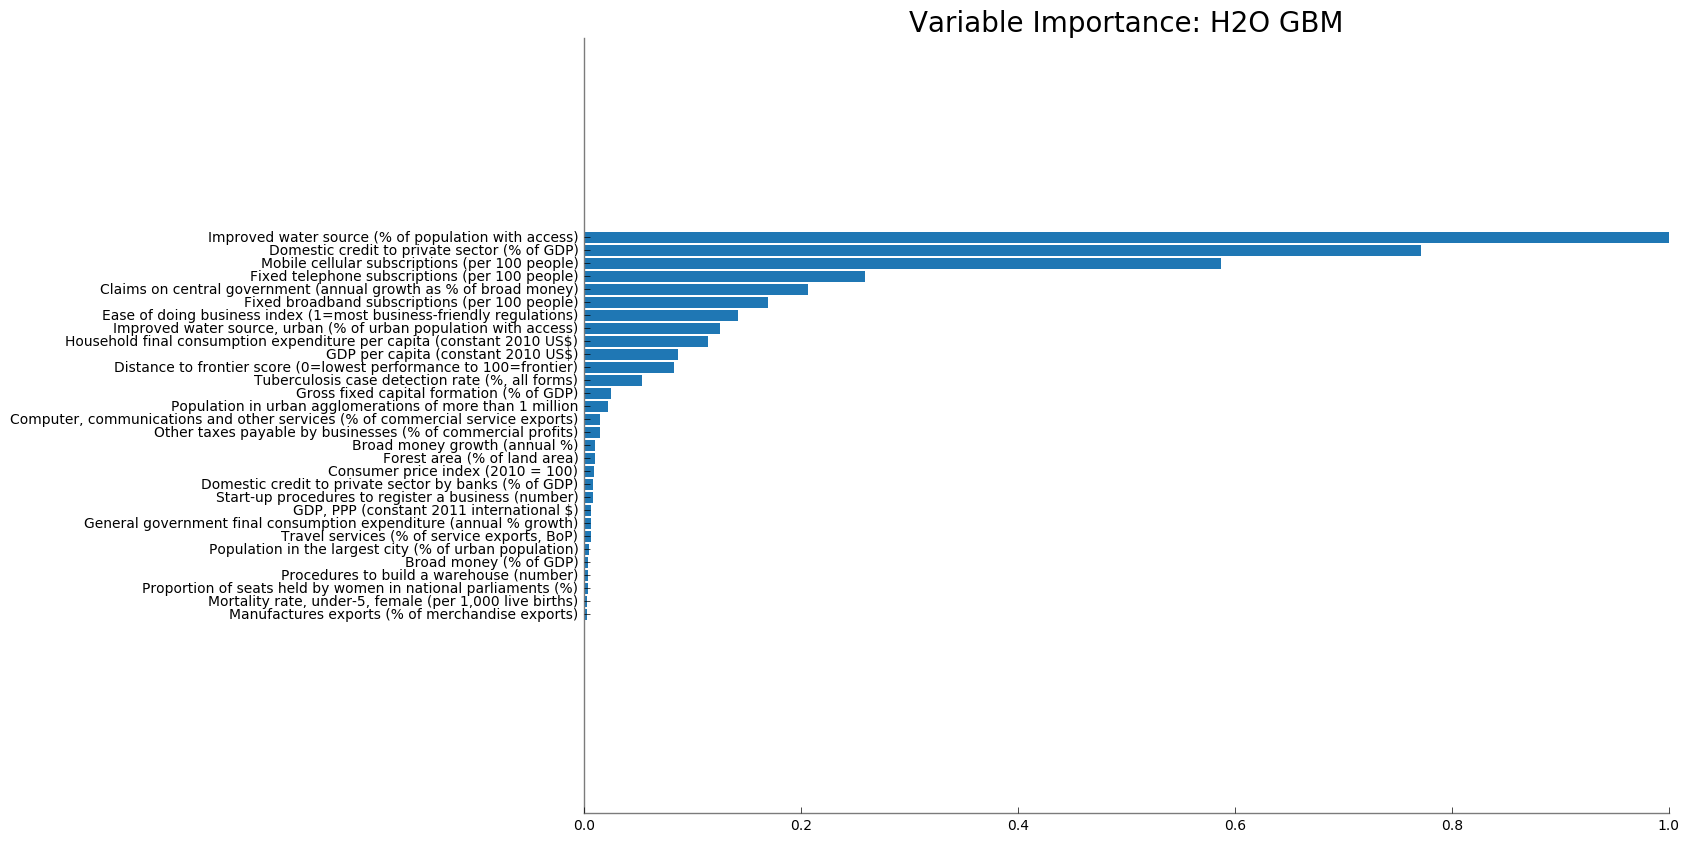

In [19]:
gbm_model.varimp_plot(num_of_features=30)

In [20]:
dfoutputgb=pd.DataFrame(gbm_model.varimp(use_pandas=True)).head(30)
dfoutputgb

,variable,relative_importance,scaled_importance,percentage
0,Improved water source (% of population with access),12.009094,1.000000,0.262713
1,Domestic credit to private sector (% of GDP),9.264609,0.771466,0.202674
2,Mobile cellular subscriptions (per 100 people),7.053155,0.587318,0.154296
3,Fixed telephone subscriptions (per 100 people),3.112884,0.259211,0.068098
4,Claims on central government (annual growth as % of broad money),2.483316,0.206786,0.054325
5,Fixed broadband subscriptions (per 100 people),2.041917,0.170031,0.044669
6,Ease of doing business index (1=most business-friendly regulations),1.706719,0.142119,0.037336
7,"Improved water source, urban (% of urban population with access)",1.510090,0.125746,0.033035
8,Household final consumption expenditure per capita (constant 2010 ...,1.376237,0.114600,0.030107
9,GDP per capita (constant 2010 US$),1.042436,0.086804,0.022804


### Random Forest

In [21]:
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model',
nfolds = 5)             # for easy lookup in flow

# train rf model
rf_model.train(
    x=predictors,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.02837180456745472
RMSE: 0.16843932013474383
MAE: 0.061667936058776684
RMSLE: 0.11014365598267137
Mean Residual Deviance: 0.02837180456745472

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.11115801241394774
RMSE: 0.33340367786505853
MAE: 0.17338291744056802
RMSLE: 0.24044087326004693
Mean Residual Deviance: 0.11115801241394774

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0822562428415654
RMSE: 0.2868034916830083
MAE: 0.14412692839338667
RMSLE: 0.20184151302022085
Mean Residual Deviance: 0.0822562428415654
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1529901,0.0375938,0.2045454,0.0660256,0.2045454,0.1212121,0.1686217
mse,0.0917313,0.0293917,0.1225620,0.0161276,0.1358471,0.0956535,0.0884662
r2,-Infinity,Infinity,-0.1205667,0.7728701,0.3343492,0.2188297,-Infinity
residual_deviance,0.0917313,0.0293917,0.1225620,0.0161276,0.1358471,0.0956535,0.0884662
rmse,0.2904738,0.0606475,0.3500885,0.1269943,0.3685744,0.309279,0.2974328
rmsle,0.2012906,0.0429426,0.2615080,0.0864787,0.2284984,0.1988992,0.2310687


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-04-21 16:49:48,1.714 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-04-21 16:49:48,1.726 sec,1.0,0.2311827,0.0753968,0.0534455,0.3492176,0.1434524,0.1219529
,2017-04-21 16:49:48,1.740 sec,2.0,0.1818527,0.0439245,0.0330704,0.3447914,0.1717262,0.1188811
,2017-04-21 16:49:48,1.752 sec,3.0,0.2865459,0.0884039,0.0821086,0.3290278,0.1644841,0.1082593
,2017-04-21 16:49:48,1.767 sec,4.0,0.3126911,0.1083406,0.0977757,0.3528687,0.1838814,0.1245163
,2017-04-21 16:49:48,1.779 sec,5.0,0.3041598,0.1092080,0.0925132,0.3540012,0.1837718,0.1253168
,2017-04-21 16:49:48,1.793 sec,6.0,0.2373665,0.0850700,0.0563429,0.3416488,0.1770519,0.1167239
,2017-04-21 16:49:48,1.804 sec,7.0,0.2320961,0.0805330,0.0538686,0.3408434,0.1767588,0.1161742
,2017-04-21 16:49:48,1.816 sec,8.0,0.2120098,0.0780782,0.0449482,0.3367325,0.1827889,0.1133888
,2017-04-21 16:49:48,1.827 sec,9.0,0.2021383,0.0721919,0.0408599,0.3308490,0.1763679,0.1094611


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Ease of doing business index (1=most business-friendly regulations),18.1159420,1.0,0.3537143
Distance to frontier score (0=lowest performance to 100=frontier),10.8695660,0.6000000,0.2122286
GDP per capita (constant 2010 US$),6.9606624,0.3842286,0.1359071
"Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient)",3.0279503,0.1671429,0.0591208
Domestic credit to private sector (% of GDP),3.0279503,0.1671429,0.0591208
---,---,---,---
"Tuberculosis case detection rate (%, all forms)",0.0,0.0,0.0
Urban population,0.0,0.0,0.0
Urban population (% of total),0.0,0.0,0.0
Urban population growth (annual %),0.0,0.0,0.0



See the whole table with table.as_data_frame()


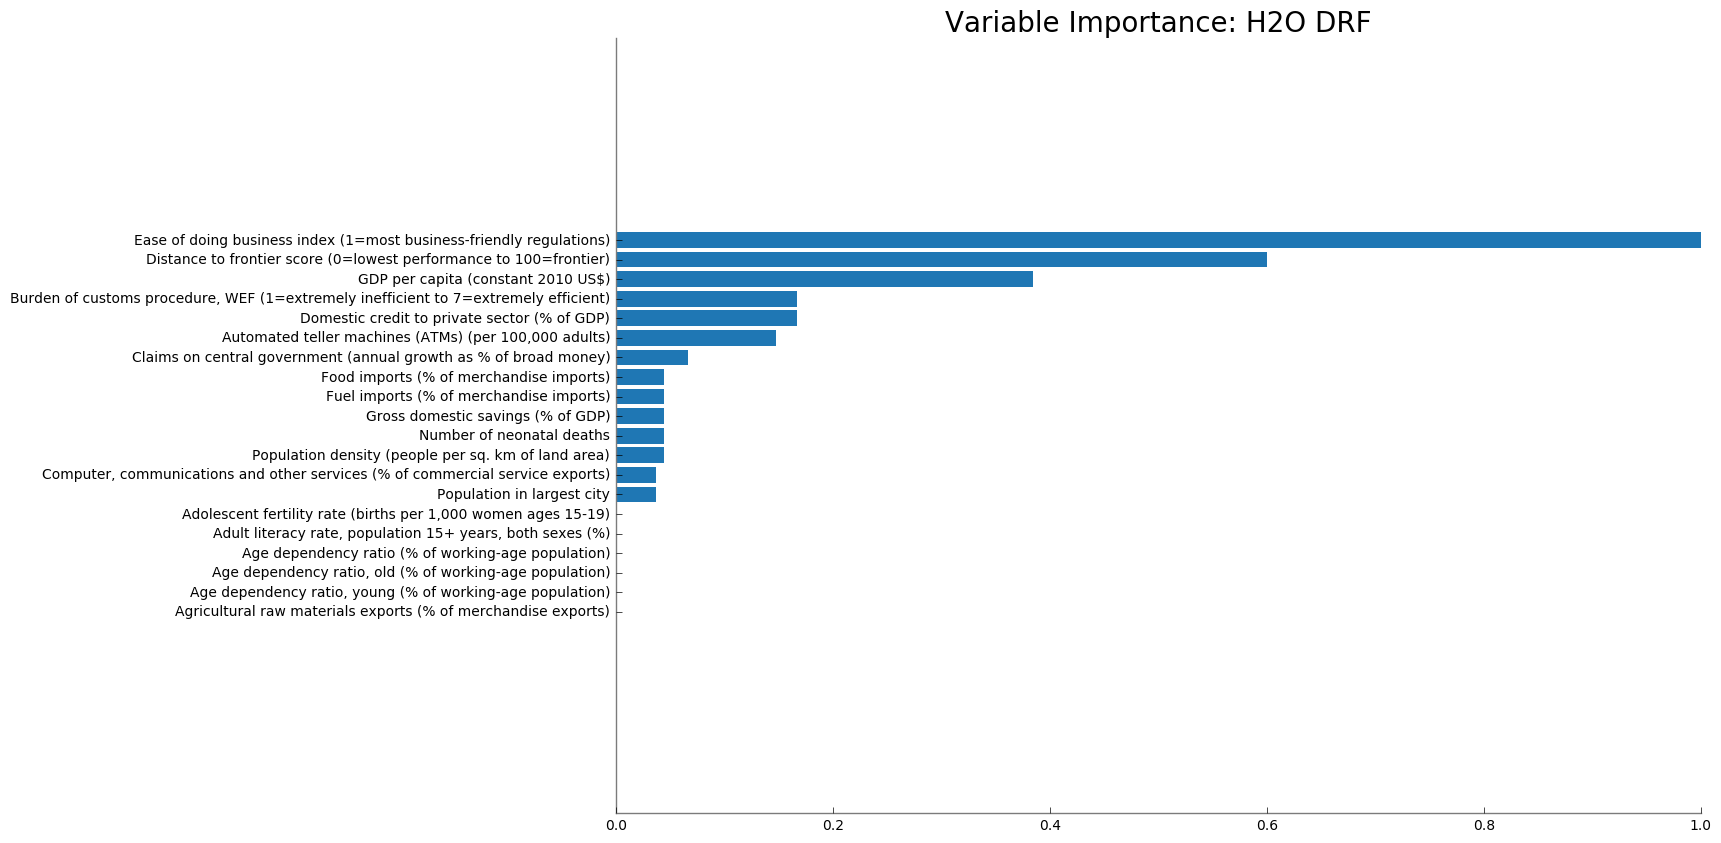

In [22]:
rf_model.varimp_plot(num_of_features=20)

In [25]:
dfoutputrf=pd.DataFrame(rf_model.varimp(use_pandas=True)).head(30)
dfoutputrf

,variable,relative_importance,scaled_importance,percentage
0,Ease of doing business index (1=most business-friendly regulations),18.115942,1.000000,0.353714
1,Distance to frontier score (0=lowest performance to 100=frontier),10.869566,0.600000,0.212229
2,GDP per capita (constant 2010 US$),6.960662,0.384229,0.135907
3,"Burden of customs procedure, WEF (1=extremely inefficient to 7=ext...",3.027950,0.167143,0.059121
4,Domestic credit to private sector (% of GDP),3.027950,0.167143,0.059121
5,"Automated teller machines (ATMs) (per 100,000 adults)",2.680912,0.147986,0.052345
6,Claims on central government (annual growth as % of broad money),1.200000,0.066240,0.023430
7,Food imports (% of merchandise imports),0.800000,0.044160,0.015620
8,Fuel imports (% of merchandise imports),0.800000,0.044160,0.015620
9,Gross domestic savings (% of GDP),0.800000,0.044160,0.015620


### View the h2o flow for more detail

http://localhost:54321/flow/index.html

In [24]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_92c7 closed.
